In [14]:
import pandas as pd
import quandl

In [19]:
df = pd.read_csv('employee.csv')
df.head()

,ID,Gender,Experience (Years),Position,Salary
0,1,F,4,DevOps Engineer,109976
1,2,M,6,DevOps Engineer,120088
2,3,M,17,Web Developer,181301
3,4,M,7,Systems Administrator,77530
4,5,F,13,Systems Administrator,152397


In [57]:
df.describe()

,Gender,Experience (Years),Salary,Position_encoded
count,400.000000,400.000000,400.00000,400.000000
mean,0.495000,9.670000,131701.19750,5.120000
std,0.500601,6.101571,43351.50899,3.193132
min,0.000000,0.000000,43643.00000,0.000000
25%,0.000000,4.000000,100484.75000,2.000000
50%,0.000000,10.000000,128561.50000,5.000000
75%,1.000000,15.000000,157735.00000,8.000000
max,1.000000,20.000000,269950.00000,10.000000


In [20]:
df.isnull().sum

<bound method DataFrame.sum of         ID  Gender  Experience (Years)  Position  Salary
0    False   False               False     False   False
1    False   False               False     False   False
2    False   False               False     False   False
3    False   False               False     False   False
4    False   False               False     False   False
..     ...     ...                 ...       ...     ...
395  False   False               False     False   False
396  False   False               False     False   False
397  False   False               False     False   False
398  False   False               False     False   False
399  False   False               False     False   False

[400 rows x 5 columns]>

In [23]:
df = df.drop('ID', axis=1)
df

,Gender,Experience (Years),Position,Salary
0,F,4,DevOps Engineer,109976
1,M,6,DevOps Engineer,120088
2,M,17,Web Developer,181301
3,M,7,Systems Administrator,77530
4,F,13,Systems Administrator,152397
...,...,...,...,...
395,F,19,Cloud Solutions Architect,236045
396,F,20,Web Developer,182770
397,F,9,Network Administrator,85550
398,M,18,Database Administrator (DBA),129996


** REPRESENTATIONS**

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

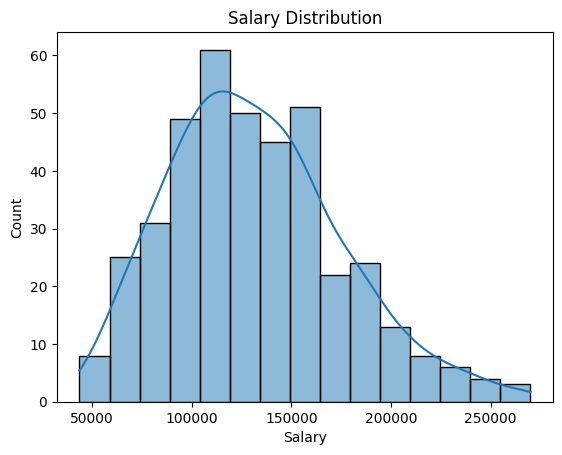

In [30]:
#Salary distribution
sns.histplot(df['Salary'], kde=True)
plt.title('Salary Distribution')
plt.show()


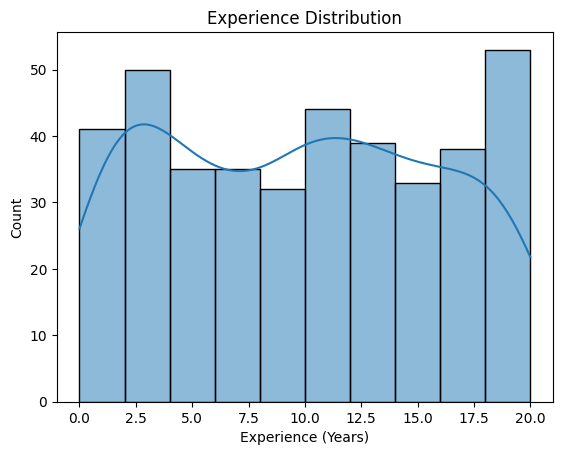

In [34]:
#experience distribution

sns.histplot(df['Experience (Years)'], kde=True)
plt.title('Experience Distribution')
plt.show()

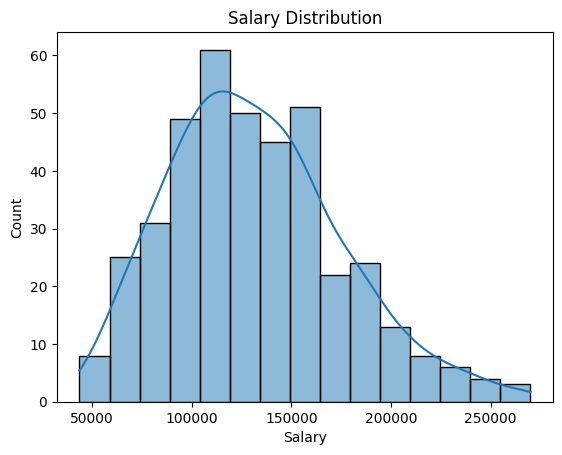

In [35]:
#experience distribution

sns.histplot(df['Salary'], kde=True)
plt.title('Salary Distribution')
plt.show()

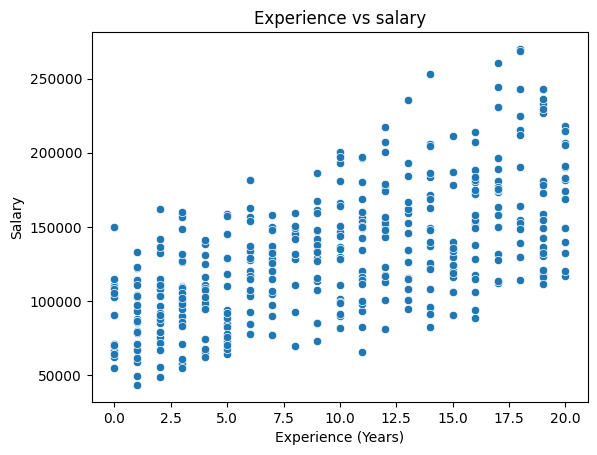

In [42]:
#Scatterplot for experience vs salary

sns.scatterplot(x='Experience (Years)', y='Salary', data=df)
plt.title('Experience vs salary')
plt.show()

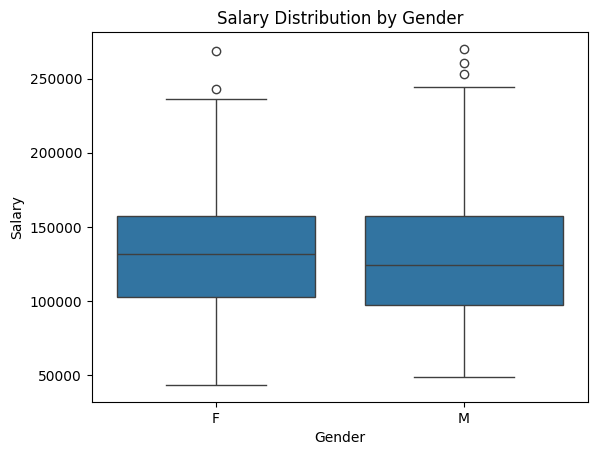

In [43]:
# Box Plot: Salary by Gender
sns.boxplot(x='Gender', y='Salary', data=df)
plt.title("Salary Distribution by Gender")
plt.show()


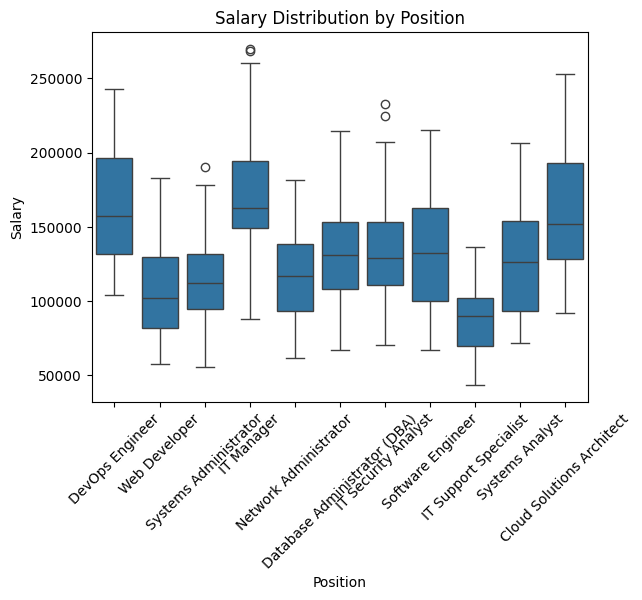

In [44]:
sns.boxplot(x='Position', y='Salary', data=df)
plt.title("Salary Distribution by Position")
plt.xticks(rotation=45)  # Rotate if labels are long
plt.show()


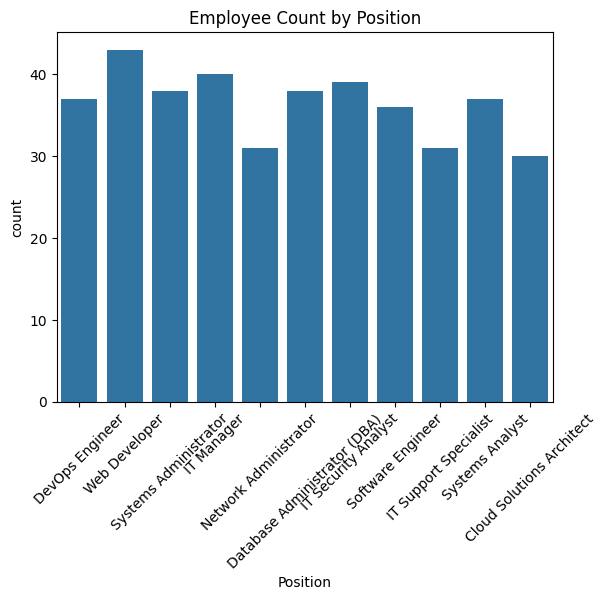

In [46]:
# Count Plot: Number of Employees per Position

sns.countplot(x='Position', data=df)
plt.title("Employee Count by Position")
plt.xticks(rotation=45)
plt.show()


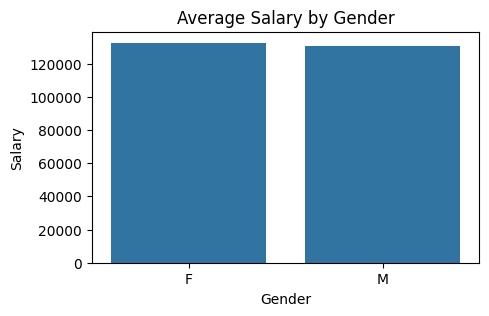

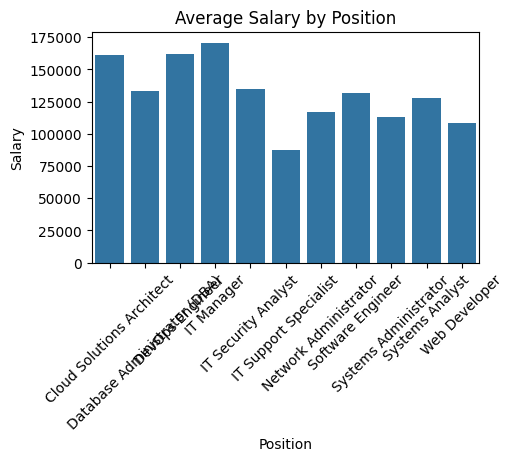

In [53]:
# By gender
plt.figure(figsize=(5, 3)) 
avg_salary_by_gender = df.groupby('Gender')['Salary'].mean().reset_index()
sns.barplot(x='Gender', y='Salary', data=avg_salary_by_gender)
plt.title("Average Salary by Gender")
plt.show()

# By position
plt.figure(figsize=(5, 3)) 
avg_salary_by_position = df.groupby('Position')['Salary'].mean().reset_index()
sns.barplot(x='Position', y='Salary', data=avg_salary_by_position)
plt.title("Average Salary by Position")
plt.xticks(rotation=45)
plt.show()


Lbel Encoding

In [54]:
df['Gender'] = df['Gender'].map({'F': 1, 'M':0})
df

,Gender,Experience (Years),Position,Salary
0,1,4,DevOps Engineer,109976
1,0,6,DevOps Engineer,120088
2,0,17,Web Developer,181301
3,0,7,Systems Administrator,77530
4,1,13,Systems Administrator,152397
...,...,...,...,...
395,1,19,Cloud Solutions Architect,236045
396,1,20,Web Developer,182770
397,1,9,Network Administrator,85550
398,0,18,Database Administrator (DBA),129996


In [56]:
#encoding the column position

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Position_encoded'] = le.fit_transform(df['Position'])
df

,Gender,Experience (Years),Position,Salary,Position_encoded
0,1,4,DevOps Engineer,109976,2
1,0,6,DevOps Engineer,120088,2
2,0,17,Web Developer,181301,10
3,0,7,Systems Administrator,77530,8
4,1,13,Systems Administrator,152397,8
...,...,...,...,...,...
395,1,19,Cloud Solutions Architect,236045,0
396,1,20,Web Developer,182770,10
397,1,9,Network Administrator,85550,6
398,0,18,Database Administrator (DBA),129996,1


In [70]:
 #Get the mapping
for i, class_name in enumerate(le.classes_):
    print(f"{class_name} → {i}")

Cloud Solutions Architect → 0
Database Administrator (DBA) → 1
DevOps Engineer → 2
IT Manager → 3
IT Security Analyst → 4
IT Support Specialist → 5
Network Administrator → 6
Software Engineer → 7
Systems Administrator → 8
Systems Analyst → 9
Web Developer → 10


In [58]:
#Defining features

X = df[[ 'Gender', 'Experience (Years)', 'Position_encoded' ]]
y = df['Salary']

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score 

In [64]:
#splitting the data to train and test

X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [65]:
#model training

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [66]:
y_pred = model.predict(X_test)

In [67]:
#model evaluation

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')


Mean Squared Error: 750198664.85
R² Score: 0.60


In [86]:
#predicting for a new person

new_data = pd.DataFrame({'Gender': [1], 'Experience (Years)': [5], 'Position_encoded': [3]})  # Use same encoding
predicted_salary = model.predict(new_data)
print(f"Predicted Salary: {predicted_salary[0]:.2f}")


Predicted Salary: 120556.72


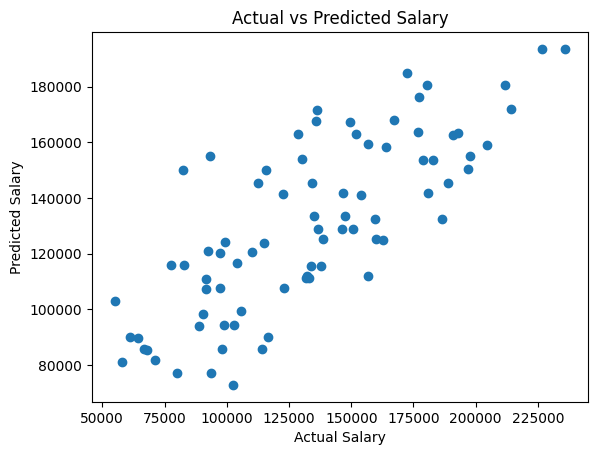

In [79]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()


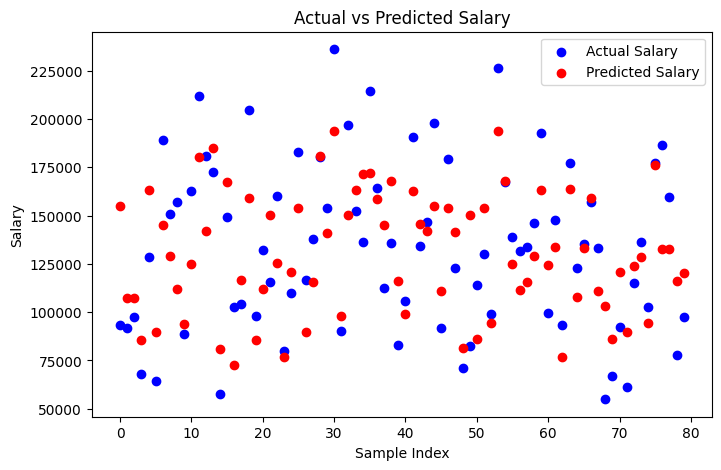

In [80]:
plt.figure(figsize=(8, 5))

plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Salary')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Salary')

plt.xlabel("Sample Index")
plt.ylabel("Salary")
plt.title("Actual vs Predicted Salary")
plt.legend()
plt.show()

Random Forest

In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {mse:.2f}")
print(f"Random Forest R² Score: {r2:.2f}")


Random Forest MSE: 835128964.71
Random Forest R² Score: 0.55


Ridge Regression

In [83]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_ridge)
r2 = r2_score(y_test, y_pred_ridge)

print(f"Ridge MSE: {mse:.2f}")
print(f"Ridge R² Score: {r2:.2f}")


Ridge MSE: 750233463.05
Ridge R² Score: 0.60


Gradient Boosting Regressor 

In [84]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr_model.fit(X_train, y_train)

y_pred_gbr = gbr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_gbr)
r2 = r2_score(y_test, y_pred_gbr)

print(f"Gradient Boosting MSE: {mse:.2f}")
print(f"Gradient Boosting R² Score: {r2:.2f}")


Gradient Boosting MSE: 724053718.58
Gradient Boosting R² Score: 0.61


In [85]:
# New person's input (as a 2D array)
new_person = [[1, 5, 3]]
predicted_salary = gbr_model.predict(new_person)
print(f"Predicted Salary: {predicted_salary[0]:,.2f}")


Predicted Salary: 150,293.38
